## Step 4A - Visualize the mean gradients

#### Interactive visualisation for MRI plots

#####  written by B. Soergel for the Autism Gradients project at Brainhack Cambridge 2017

NB: If you are on a Mac, and the widgets are not working:
"jupyter nbextension enable --py --sys-prefix widgetsnbextension"
before starting the notebook server with "jupyter notebook"
https://github.com/ipython/ipywidgets/issues/541

In [2]:
%matplotlib inline
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
from matplotlib import colors
import nilearn
import nilearn.plotting
from __future__ import print_function,division

In [3]:
from ipywidgets import widgets
from ipywidgets import interact,fixed
from IPython.display import display

In [4]:
def rebuild_nii_compute(data,nim,num):
    """
    precompute to make widget faster
    """
    
    #data = np.load('Mean_Vec.npy')
    a = data[:,num].copy()
    #nim = nib.load('cc400_roi_atlas.nii')
    imdat=nim.get_data()
    imdat_new = imdat.copy()

    for n, i in enumerate(np.unique(imdat)):
        if i != 0:
            imdat_new[imdat == i] = a[n-1] * 100000 # scaling factor. Could also try to get float values in nifti...

    nim_out = nib.Nifti1Image(imdat_new, nim.get_affine(), nim.get_header())
    nim_out.set_data_dtype('float32')
    # to save:
    #nim_out.to_filename('Gradient_'+ str(num) +'_res.nii')

    #nilearn.plotting.plot_epi(nim_out)
    return nim_out,imdat_new

def rebuild_nii_plot(num,nims,cutc_x,cutc_y,cutc_z):
    """
    simple plotting function for widget
    """
    cut_coords = (cutc_x,cutc_y,cutc_z)
    fig = nilearn.plotting.plot_epi(nims[num],cut_coords=cut_coords)
    plt.show()
    
def rebuild_nii_plot_new(num,imdats_new,cutc_x,cutc_y,cutc_z,cmap,figsize):
    """
    maybe using matplotlib is faster
    """
    cut_coords = (cutc_x,cutc_y,cutc_z)
    fig,axes=plt.subplots(1,3,figsize=figsize)
    imdat = imdats_new[num]
    axes[0].imshow(imdat[:,cutc_y,:].T,cmap=cmap,origin='lower')
    axes[0].set_title('y')
    axes[1].imshow(imdat[cutc_x,:,:].T,cmap=cmap,origin='lower')
    axes[1].set_title('x')
    axes[2].imshow(imdat[:,:,cutc_z].T,cmap=cmap,origin='lower')
    axes[2].set_title('z')
    plt.show()

In [5]:
#prepare data
data = np.load('./data/Mean_Vec.npy')
nim = nib.load('./ROIs_Mask/cc400_roi_atlas.nii')
imdat=nim.get_data()
print(data.shape,imdat.shape)

(392, 10) (63, 75, 61)


In [6]:
#precompute to speed up widget
nims = []
imdats = []
for j in range(data.shape[1]):
    nim_new,imdat_new = rebuild_nii_compute(data,nim,j)
    nims.append(nim_new)
    imdats.append(imdat_new)

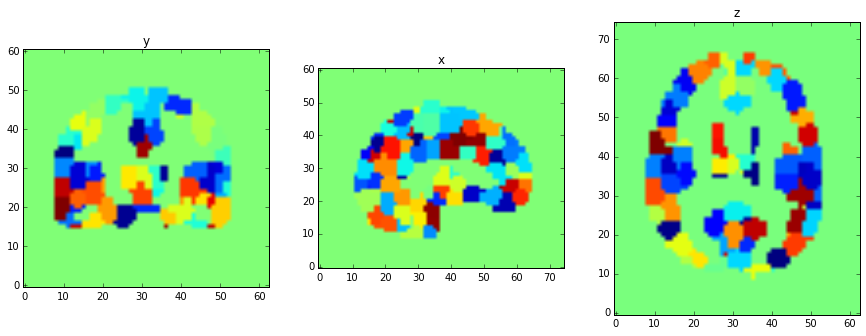

In [7]:
coords_max = imdat.shape
figsize=(15,10)
i = interact(rebuild_nii_plot_new,
             num=(0,9),
             imdats_new=fixed(imdats),
             cutc_x=(0,coords_max[0]-1),
             cutc_y=(0,coords_max[1]-1),
             cutc_z=(0,coords_max[2]-1),
             cmap = ['jet','viridis','gray'],
             figsize=fixed(figsize)
            )